In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
dta=pd.read_csv('Mall_Customers.csv',sep=',')

In [88]:
dta.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [89]:
list(dta.columns.values) 

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [90]:
x=dta.iloc[:,[3,4]]
x.shape

(200, 2)

# Heatmap of the variables:

The Graph Shows the correlation between the different variables of the Mall Customer Dataset, This Heat map reflects the most correlated features with cream Color and least correlated features with black color.
and we can observe co-relation betweeen Anual income and spending score, is in voilet color.it shows good correlatin between variables.

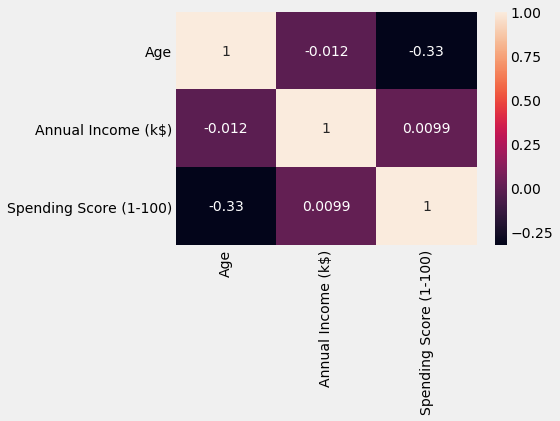

In [91]:
dda=dta.iloc[:,[1,2,3,4]]
corrmat=dda.corr()
sns.heatmap(corrmat,annot=True,CMap='RdYlGn')

Relation ship between mostly correlated variables Annual Income and spending score, here I plotted relationship plot using relpot

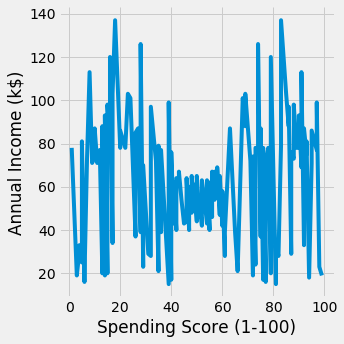

In [92]:
sns.relplot('Spending Score (1-100)','Annual Income (k$)',estimator=None,data=dta,kind='line')

Relation ship between mostly correlated variables Annual Income and spending score and Gender, here I plotted relationship plot using relpot.

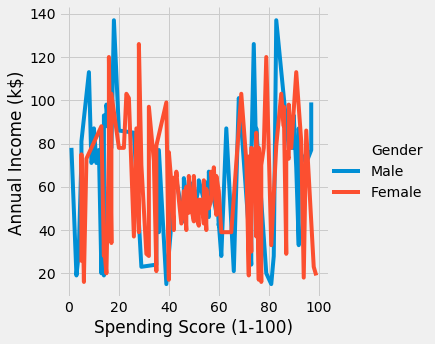

In [93]:
sns.relplot('Spending Score (1-100)','Annual Income (k$)',hue='Gender',estimator=None,data=dta,kind='line')

Distribution of spending score uing catplot.

C:\Users\SANTOSH\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'distribution of spending score')

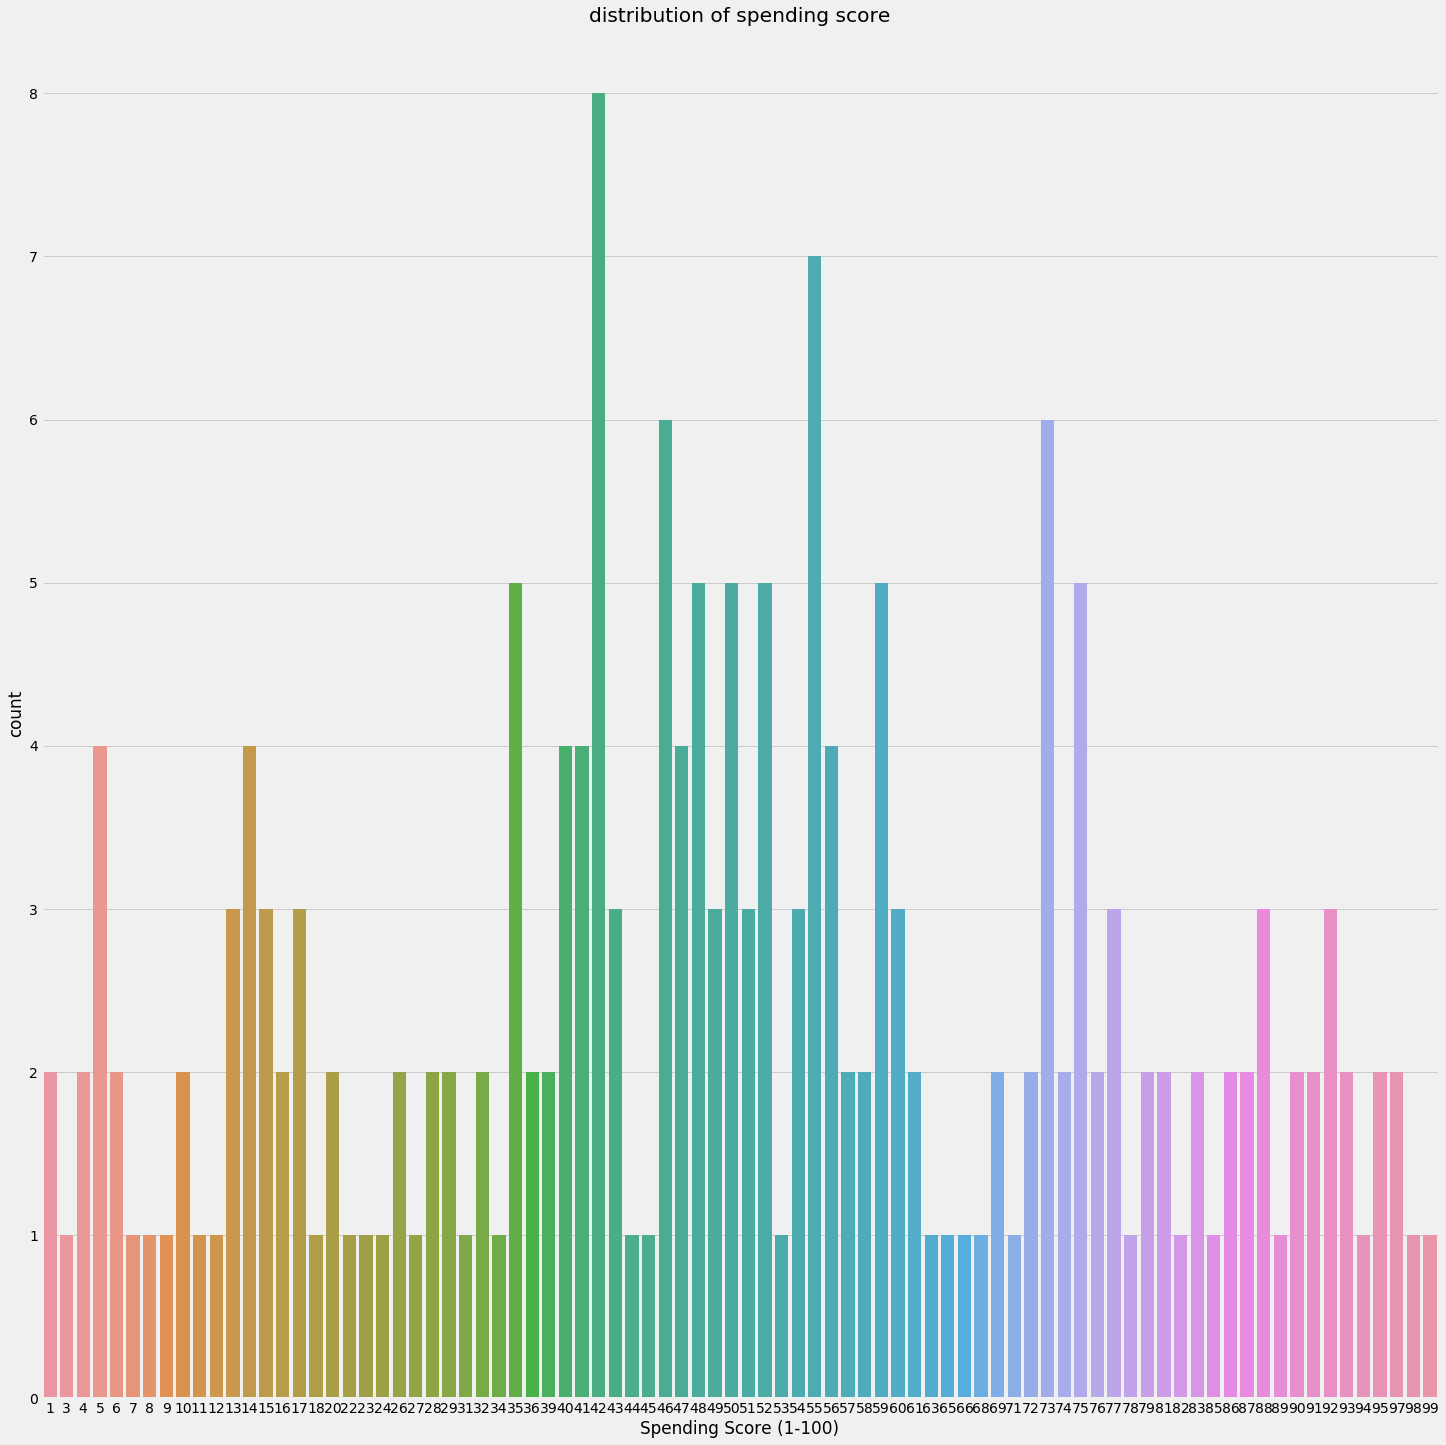

In [94]:
sns.catplot('Spending Score (1-100)',data=dta,kind='count',size=20)
plt.title('distribution of spending score')

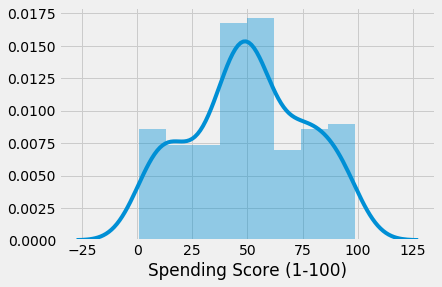

In [95]:
sns.distplot(dta['Spending Score (1-100)'],kde=True)

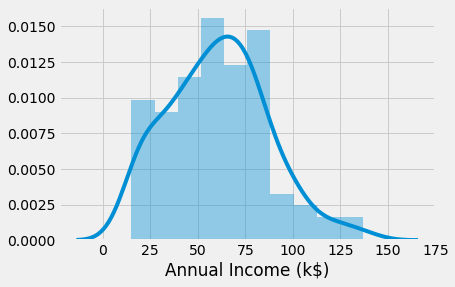

In [96]:
sns.distplot(dta['Annual Income (k$)'],kde=True)

C:\Users\SANTOSH\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'distribution of Annual Income (k$)')

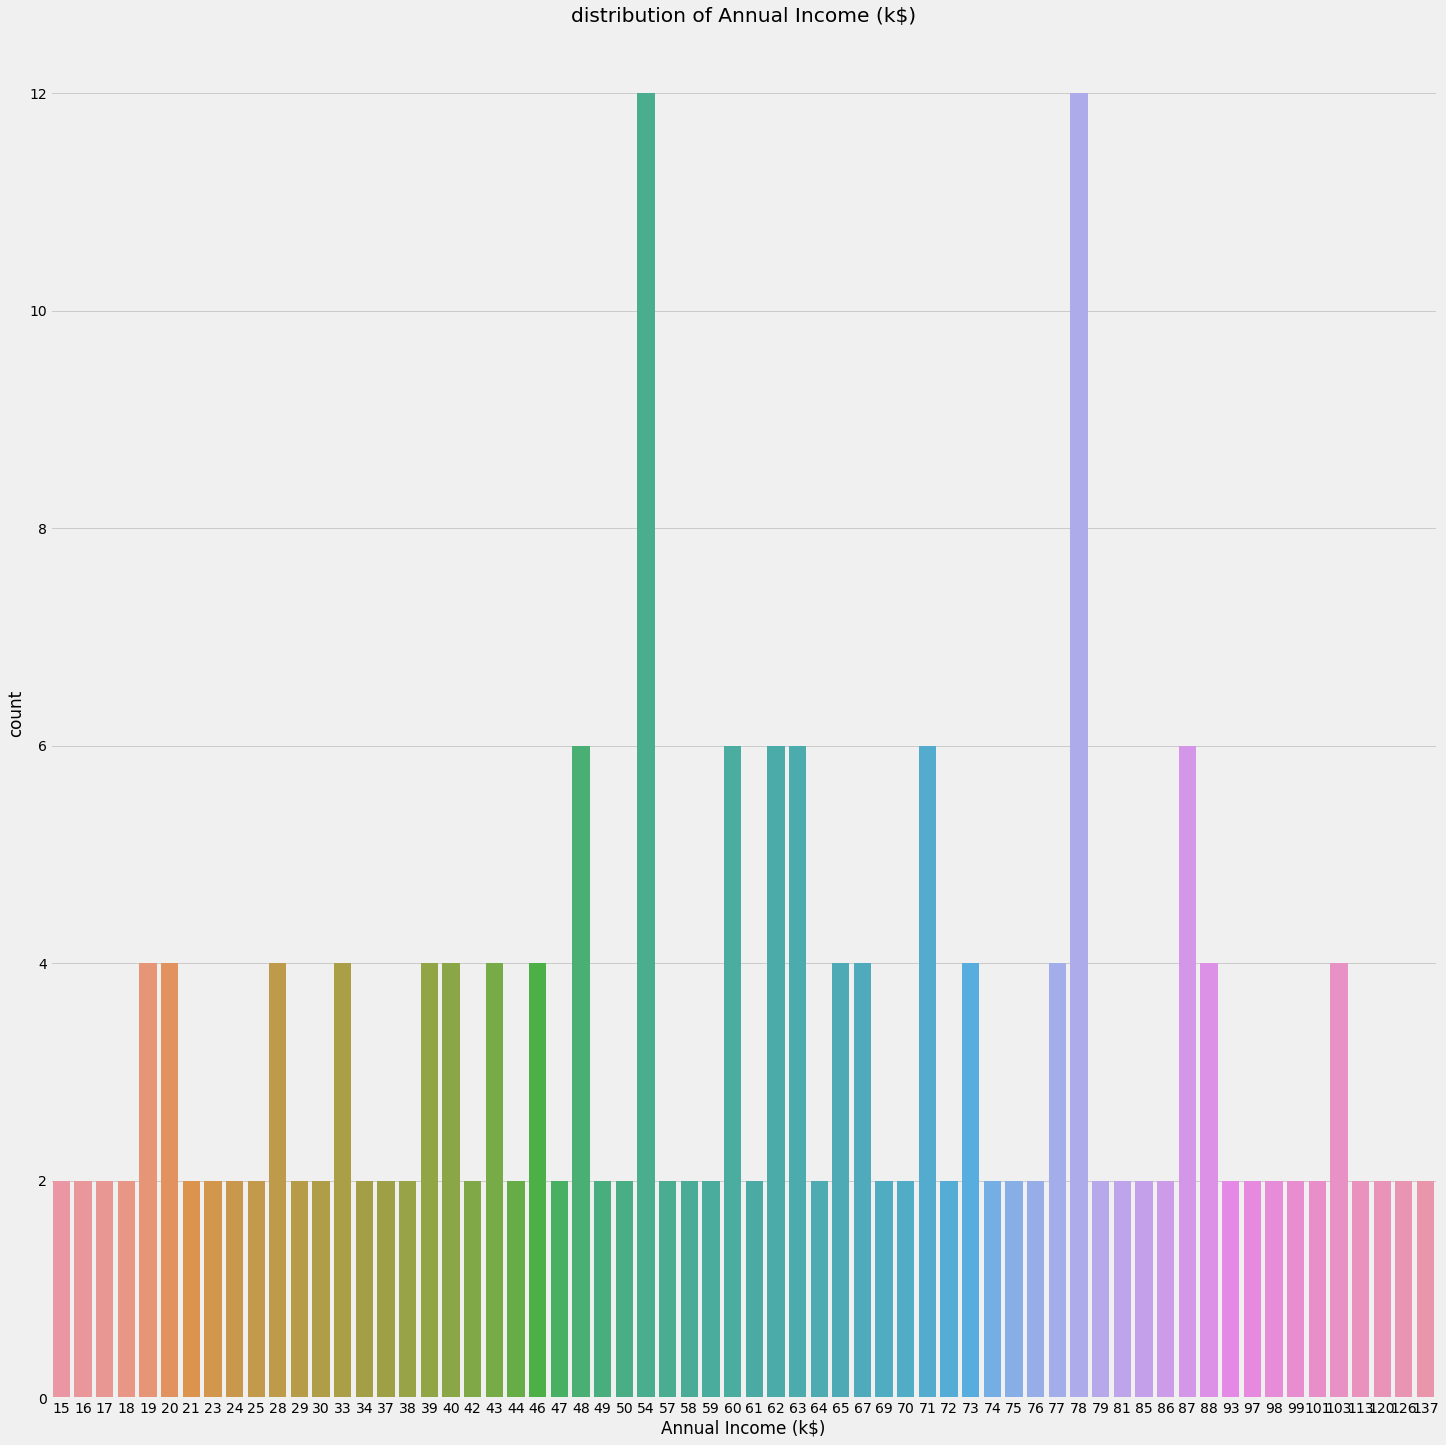

In [97]:
sns.catplot('Annual Income (k$)',data=dta,kind='count',size=20)
plt.title('distribution of Annual Income (k$)')

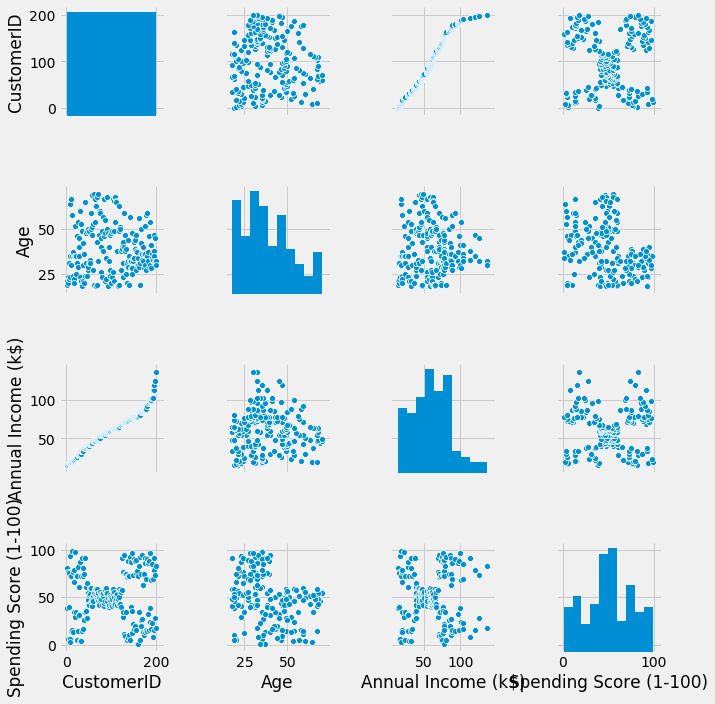

In [98]:
sns.pairplot(dta)

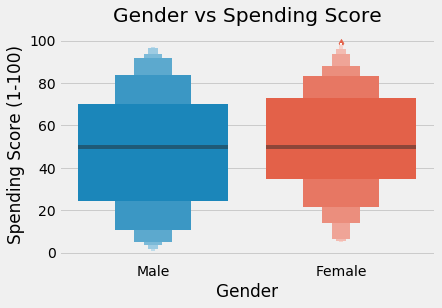

In [99]:
sns.boxenplot(dta['Gender'], dta['Spending Score (1-100)'])
plt.title('Gender vs Spending Score')
plt.show()

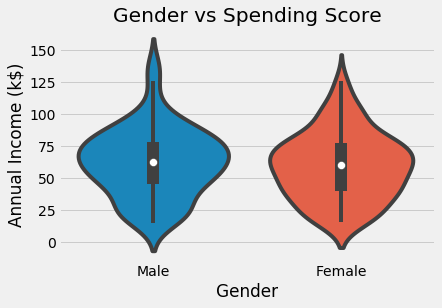

In [100]:
sns.violinplot(dta['Gender'], dta['Annual Income (k$)'])
plt.title('Gender vs Spending Score')
plt.show()

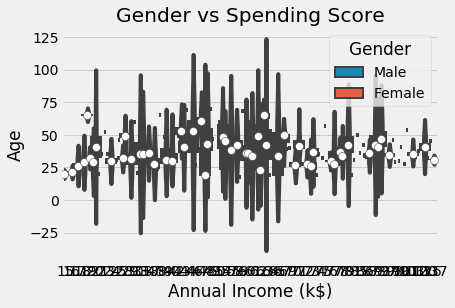

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [101]:
sns.violinplot(dta['Annual Income (k$)'],dta['Age'],hue=dta['Gender'],size=50)
plt.title('Gender vs Spending Score')
plt.show()
plt.figure(figsize=(15,15))

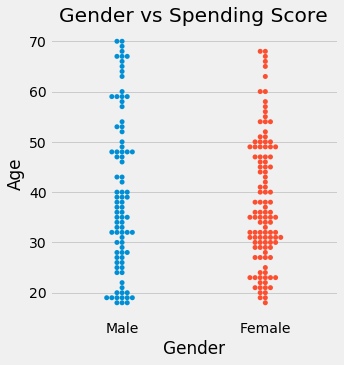

In [102]:
sns.catplot('Gender', 'Age',kind='swarm',data=dta)
plt.title('Gender vs Spending Score')
plt.show()

# Segmentation using Clustering

After the analysis using different plots, I am using spending score and annual income variables to cluster the dataset.
Here I used KMeans clustering and Hierarchical clustering for the segmentation of the dataset.

In [103]:
from sklearn.cluster import KMeans

In [104]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init =100)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

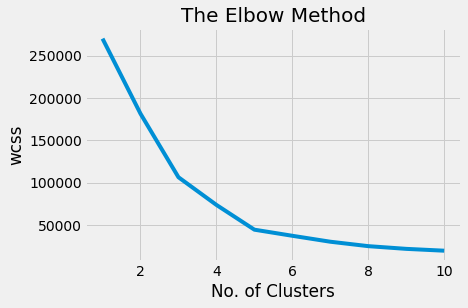

In [105]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [106]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

y_means

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [107]:
dta['y_means']=y_means
dta.head(n=10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),y_means
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
5,6,Female,22,17,76,3
6,7,Female,35,18,6,4
7,8,Female,23,18,94,3
8,9,Male,64,19,3,4
9,10,Female,30,19,72,3


In [108]:
x['y_means']=y_means
x.head()

C:\Users\SANTOSH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Annual Income (k$),Spending Score (1-100),y_means
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


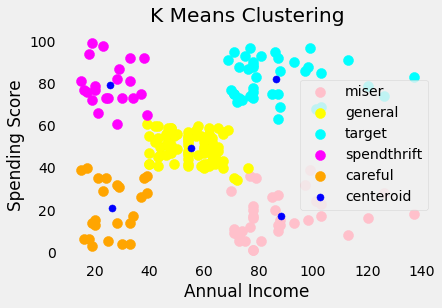

In [109]:
plt.scatter(x['Annual Income (k$)'][x['y_means'] ==0], x['Spending Score (1-100)'][x['y_means'] == 0], s = 100, c = 'pink', label = 'miser')
plt.scatter(x['Annual Income (k$)'][x['y_means']== 1], x['Spending Score (1-100)'][x['y_means'] == 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x['Annual Income (k$)'][x['y_means'] == 2], x['Spending Score (1-100)'][x['y_means'] == 2], s = 100, c = 'cyan', label = 'target')
plt.scatter(x['Annual Income (k$)'][x['y_means'] == 3], x['Spending Score (1-100)'][x['y_means']== 3], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x['Annual Income (k$)'][x['y_means'] == 4], x['Spending Score (1-100)'][x['y_means'] == 4], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

# Hierarchical clustering

In [110]:
import scipy.cluster.hierarchy as sch

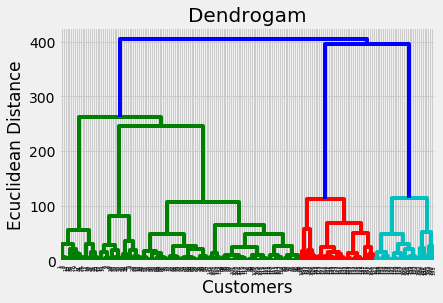

In [111]:
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

In [112]:
from sklearn.cluster import AgglomerativeClustering

In [113]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

In [114]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [115]:
dta['y_hmeans']=y_hc
dta.head(n=10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),y_means,y_hmeans
0,1,Male,19,15,39,4,4
1,2,Male,21,15,81,3,3
2,3,Female,20,16,6,4,4
3,4,Female,23,16,77,3,3
4,5,Female,31,17,40,4,4
5,6,Female,22,17,76,3,3
6,7,Female,35,18,6,4,4
7,8,Female,23,18,94,3,3
8,9,Male,64,19,3,4,4
9,10,Female,30,19,72,3,3


In [116]:
x['y_hmeans']=y_hc
x.head()

C:\Users\SANTOSH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Annual Income (k$),Spending Score (1-100),y_means,y_hmeans
0,15,39,4,4
1,15,81,3,3
2,16,6,4,4
3,16,77,3,3
4,17,40,4,4


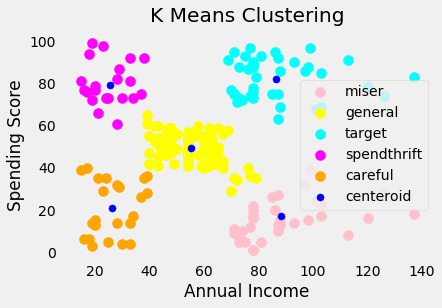

In [117]:
plt.scatter(x['Annual Income (k$)'][x['y_hmeans'] ==0], x['Spending Score (1-100)'][x['y_hmeans'] == 0], s = 100, c = 'pink', label = 'miser')
plt.scatter(x['Annual Income (k$)'][x['y_hmeans']== 1], x['Spending Score (1-100)'][x['y_hmeans'] == 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x['Annual Income (k$)'][x['y_hmeans'] == 2], x['Spending Score (1-100)'][x['y_hmeans'] == 2], s = 100, c = 'cyan', label = 'target')
plt.scatter(x['Annual Income (k$)'][x['y_hmeans'] == 3], x['Spending Score (1-100)'][x['y_hmeans']== 3], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x['Annual Income (k$)'][x['y_hmeans'] == 4], x['Spending Score (1-100)'][x['y_hmeans'] == 4], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()